In [1]:
%matplotlib inline
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
myfont = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14}
rc('font', **myfont)
#rc('font', **{'family': 'serif'})
rc('text', usetex=True)

In [2]:
import sys
module_path = '/home/g88077/Documents/2021/uqwind_phd/Central_Tendancy/central_tendancy_benchmark'
sys.path.append(str(module_path))

In [3]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# G-Sobol problem description

In [4]:
problem = ctb.CentralTendencyGSobolProblem()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

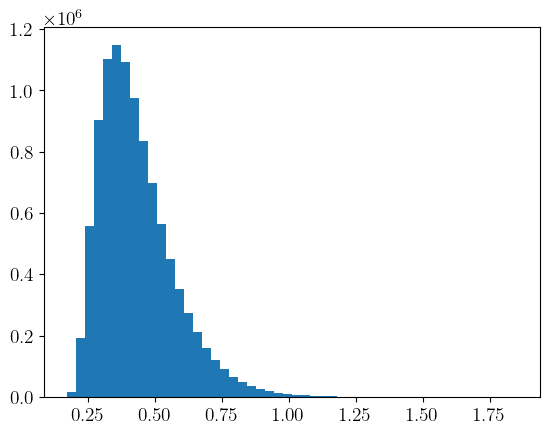

In [5]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(int(1e5))
plt.hist(np.array(output_sample).flatten(), 50);

# Benchmark

In [6]:
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**13, distribution, None)

In [7]:
n = 100
doe_generator.scale_coefficient = 1.
kh_sample = doe_generator.generate_sample('kernel herding', n, None, candidate_points)
sp_sample = doe_generator.generate_sample('support points', n, None, candidate_points)
kh_weights = doe_generator.compute_bayesian_quadrature_weights(kh_sample, candidate_points)
sp_weights = doe_generator.compute_bayesian_quadrature_weights(sp_sample, candidate_points)

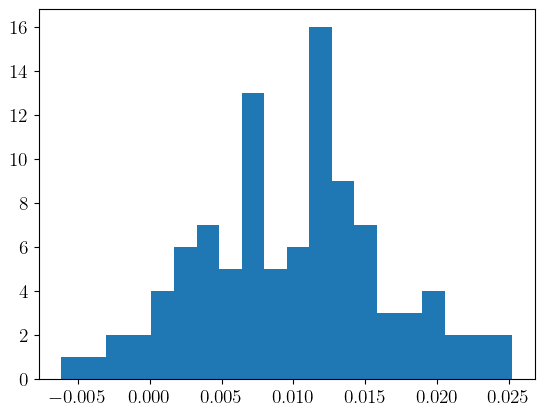

In [8]:
plt.hist(sp_weights, bins=20);

In [9]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 550, 50))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [10]:
bench.scale_coefficient = 1.
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
#df_benchmark.to_csv('results/ct_benchmark_{}.csv'.format(problem_name), index=False)

START: problem=GSobol 5D (normal input) | method=kernel herding
START: problem=GSobol 5D (normal input) | method=support points
START: problem=GSobol 5D (normal input) | method=sobol
DONE: problem=GSobol 5D (normal input) | method=sobol
DONE: problem=GSobol 5D (normal input) | method=support points
DONE: problem=GSobol 5D (normal input) | method=kernel herding


In [11]:
df_benchmark.loc[80, 'm*']

0.43265944699315856

In [12]:
df_benchmark.loc[80, 'm']

0.4321240575728373

In [13]:
print(0.4334546783396362)

0.4334546783396362


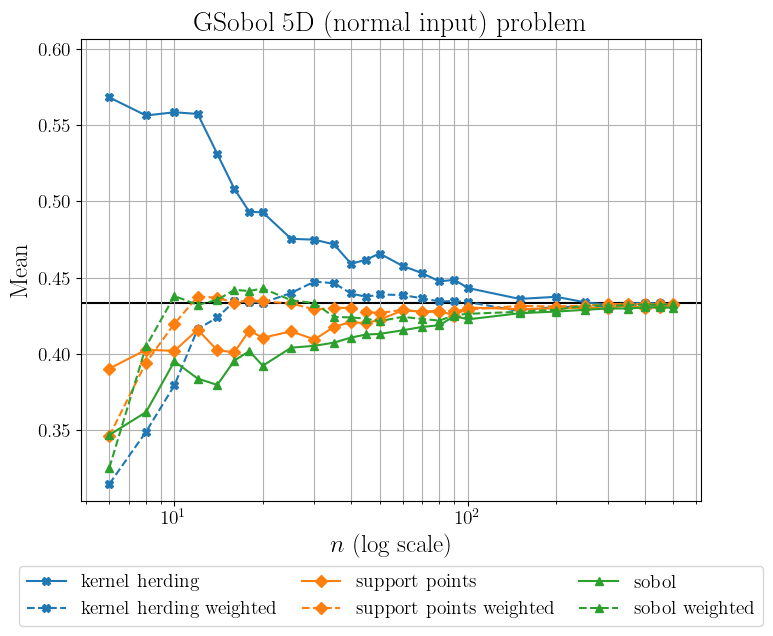

In [14]:
sfile = 'res/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);